In [8]:
import math
from typing import List, Optional
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def printTreeStructure(root):
    if root is None:
        return
    
    print(root.val, end=':')
    if root.left:
        print("L ", root.left.val, end=', ')
    if root.right:
        print("R ", root.right.val, end='\n')
    printTreeStructure(root.left)
    print()
    printTreeStructure(root.right)


# Input of Tree from User
def CreateTreeLevelOrder(input_data: List[int]) -> Optional['TreeNode']:
    if not input_data:
        return None
    
    root = TreeNode(input_data[0])
    queue = deque()
    queue.append(root)

    i = 1
    while i < len(input_data):
        node = queue.popleft()

        if i < len(input_data) and input_data[i] != None:
            node.left = TreeNode(input_data[i])
            queue.append(node.left)
        
        i += 1

        if  i < len(input_data) and input_data[i] != None:
            node.right = TreeNode(input_data[i])
            queue.append(node.right)

        i += 1

    return root

def levelOrder_array(root):

    if not root:
        return []
    
    queue = deque([root])
    ans = []

    while queue:
        level_size = len(queue)
        level = []

        for i in range(level_size):
            node = queue.popleft()

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
            
            level.append(node.val)

        ans.append(level)

    return ans

def inOrderPrint(root):
    if root is None:
        return

    inOrderPrint(root.left)
    print(root.val, end=' ')
    inOrderPrint(root.right)

def printTreeVisualWithLines(root: Optional['TreeNode']):
    # Get the height of the tree to determine the width of the printed structure
    def getHeight(node):
        if not node:
            return 0
        return 1 + max(getHeight(node.left), getHeight(node.right))
    
    height = getHeight(root)
    width = (2 ** height) - 1  # Full width of the tree at the bottom level

    # Initialize a 2D list to hold the tree structure (including lines)
    res = [[" " for _ in range(width)] for _ in range(2 * height - 1)]

    # Helper function to fill the 2D list
    def fillTreeWithLines(node, level, left, right):
        if not node:
            return
        mid = (left + right) // 2
        res[2 * level][mid] = str(node.val)

        if node.left:
            left_mid = (left + mid) // 2
            res[2 * level + 1][left_mid] = "/"
            fillTreeWithLines(node.left, level + 1, left, mid - 1)
        
        if node.right:
            right_mid = (mid + right) // 2
            res[2 * level + 1][right_mid] = "\\"
            fillTreeWithLines(node.right, level + 1, mid + 1, right)

    # Fill the 2D list with tree nodes and lines
    fillTreeWithLines(root, 0, 0, width - 1)

    # Print the tree structure row by row
    for row in res:
        print("".join(row))

In [2]:
values = [
    1, 2, 3, 
    4, 5, None, 7, 
    8, 9, 10, None, None, None, None, 
    11, None, None, 12, None, None, None, 13
]
root = CreateTreeLevelOrder(input_data=values)
printTreeVisualWithLines(root)

                               1                               
               /                              \                
               2                               3               
       /              \                               \        
       4               5                               7       
   /      \        /                                           
   8       9       10                                           
    \            /                                             
     11           12                                             
                /                                              
                13                                              


In [3]:
# RemoveLeaves

def removeLeaves(root):
    if root is None:
        return None
    
    if not root.left and not root.right:
        return None

    root.left = removeLeaves(root.left)
    root.right = removeLeaves(root.right)

    return root


removeLeaves(root)
printTreeVisualWithLines(root)

               1               
       /              \        
       2               3       
   /      \                    
   4       5                   
 /       /                     
 8       10                     
        /                      
        12                      


In [5]:
values = [
    1, 2, 3, 
    4, 5, 6, 7
]
root = CreateTreeLevelOrder(input_data=values)
printTreeVisualWithLines(root)

   1   
 /  \  
 2   3 
/\  /\ 
4 5 6 7


In [17]:
# Mirror Binary Tree

def mirrorTree(root):
    if root is None:
        return

    root.left, root.right = root.right, root.left

    mirrorTree(root.left)
    mirrorTree(root.right)


mirrorTree(root)
printTreeVisualWithLines(root)

   1   
 /  \  
 2   3 
/\  /\ 
4 5 6 7


In [28]:
# # Check if the tree is balanced ( O(n^2) because of hieght function )

def height(root):
    if not root:
        return 0
    
    return 1 + max(height(root.left), height(root.right)) 


def is_balanced(root):

    if not root:
        return True
    
    l_height = height(root.left)
    r_height = height(root.right)

    if abs(l_height - r_height) > 1:
        return False

    return is_balanced(root.left) and is_balanced(root.right)


# printTreeVisualWithLines(root)
is_balanced(root)

False

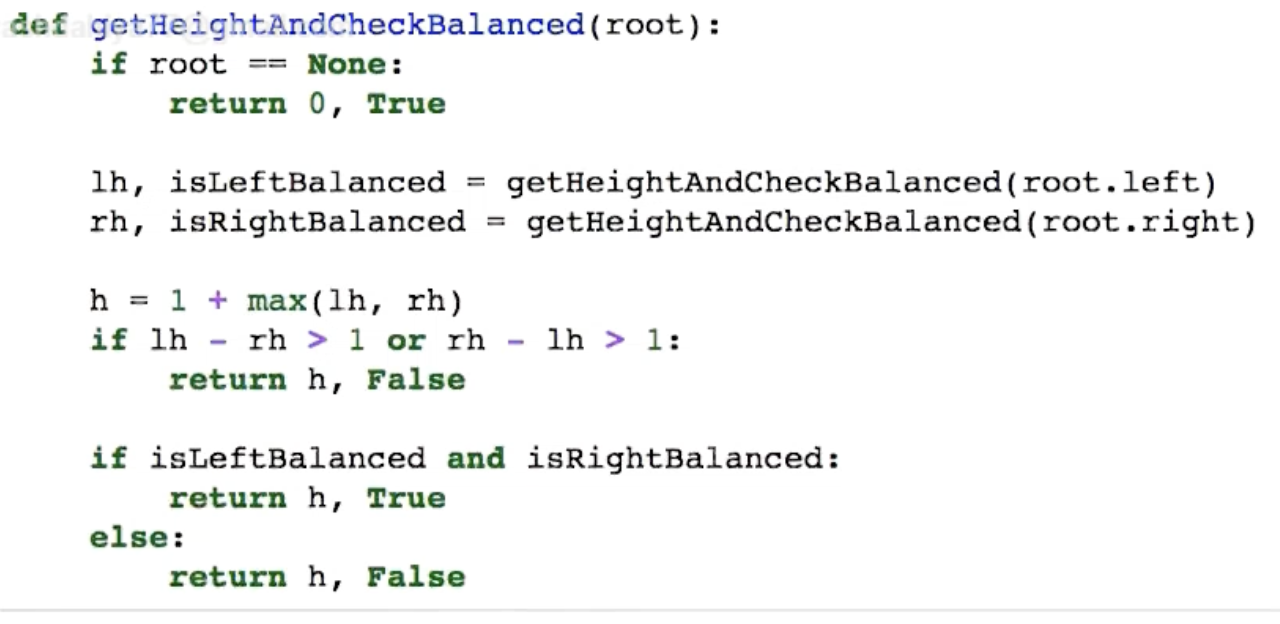

In [33]:
# Check if the tree is balanced  --- Another approach

def is_balanced(root):
    if root is None:
        return 0, True

    left_height, is_left_balanced = is_balanced(root.left)
    right_height, is_right_balanced = is_balanced(root.right)

    current_height = 1 + max(left_height, right_height)

    balanced = (
            is_left_balanced and 
            is_right_balanced and 
            abs(left_height - right_height) <= 1
        )

    return current_height, balanced


_, balanced = is_balanced(root)

print(balanced)


55578.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: number expected
True


In [29]:
values = [1, 2, 3, 4, None, 6, 7, 5, None, None, None, None, None]

values = [
    1, 2, 3, 
    4, 5, 6, 7
]

root = CreateTreeLevelOrder(input_data=values)
printTreeVisualWithLines(root)

   1   
 /  \  
 2   3 
/\  /\ 
4 5 6 7


In [32]:
# Check if the tree is balanced  --- Another Easy approach

def is_balanced(root):

    def helper(root):

        if not root:
            return 0

        left_height = helper(root.left)
        if left_height == -1:
            return -1

        right_height = helper(root.right)
        if right_height == -1:
            return -1

        if abs(left_height - right_height) > 1:
            return -1

        return max(left_height, right_height) + 1

    return helper(root) != -1

printTreeVisualWithLines(root)
print(is_balanced(root))  # Output: True

   1   
 /  \  
 2   3 
/\  /\ 
4 5 6 7
True


In [43]:
values = [1, 2, 3, 4, None, 6, 7, 5, None, None, None, None, None]

values = [
    1, 2, 3, 
    None, None, 4, 6,
    5, None, None, 7,
    9, None, None, 8
]

root = CreateTreeLevelOrder(input_data=values)
printTreeVisualWithLines(root)

               1               
       /              \        
       2               3       
                   /      \    
                   4       6   
                 /          \  
                 5           7 
                /            \ 
                9             8


In [44]:
# Diameter of a Tree   -- O(n^2)

def heightTree(root):
    if not root:
        return 0

    return 1 + max(height(root.left), heightTree(root.right))


def diameter_of_tree(root):
    global max_dia

    if not root:
        return 0

    lh = heightTree(root.left)
    rh = heightTree(root.right)

    h = lh + rh

    max_dia = max(h, max_dia)

    diameter_of_tree(root.left)
    diameter_of_tree(root.right)




max_dia = 0
diameter_of_tree(root)
print(max_dia)  # Output: 2

6


In [53]:
# Diameter of a Tree  --- O(n)


def diameter_of_tree(root) -> int:

    def dfs(root):
        nonlocal max_dia

        if not root:
            return 0

        lh = dfs(root.left)
        rh = dfs(root.right)

        max_dia = max(max_dia, lh + rh)

        return 1 + max(lh, rh)



    max_dia = 0
    dfs(root)
    return max_dia


diameter_of_tree(root)

6